**Tasks for milestone 2**
* Data wrangling: clean and deal with unvalid or missing data; combine data files for useful information
* Construct a countries occurence list
* Identify key words related to international affairs in the body text
* Find the communication frequency between Hillary and the others
* Personal social network creation and analysis: use the communication frequency to create a personal social network of Hillary and analyze the network structure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_folder = './hillary-clinton-emails/'

In [3]:
emails_raw = pd.read_csv(data_folder + 'Emails.csv', parse_dates=['MetadataDateSent', 'MetadataDateReleased', 'ExtractedDateSent', 'ExtractedDateReleased'])
aliases = pd.read_csv(data_folder + 'Aliases.csv')
emailreceivers = pd.read_csv(data_folder + 'EmailReceivers.csv')
persons = pd.read_csv(data_folder + 'Persons.csv')

In [4]:
rawtext = emails_raw[['Id', 'RawText']]

In [5]:
rawtext.head()

,Id,RawText
0,1,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
rawtext_list = emails_raw['RawText']

In [7]:
emails = emails_raw[['Id',
                    'MetadataSubject',
                    'MetadataTo',
                    'MetadataFrom',
                    'SenderPersonId',
                    'MetadataDateSent',
                    'MetadataDateReleased',
                    'ExtractedSubject',
                    'ExtractedTo',
                    'ExtractedFrom', 
                    'ExtractedCc',
                    'ExtractedDateSent',
                    'ExtractedDateReleased',
                    'ExtractedReleaseInPartOrFull',
                    'ExtractedBodyText']]

In [8]:
emails.head()

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText
0,1,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00,2015-05-22 04:00:00,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",2015-05-13,RELEASE IN FULL,NaN
1,2,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03 05:00:00,2015-05-22 04:00:00,NaN,NaN,NaN,NaN,nan,2015-05-13,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00,2015-05-22 04:00:00,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",2015-05-14,RELEASE IN PART,Thx
3,4,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00,2015-05-22 04:00:00,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",2015-05-13,RELEASE IN PART,NaN
4,5,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11 05:00:00,2015-05-22 04:00:00,NaN,NaN,NaN,NaN,nan,2015-05-13,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


### Construct a countries occurence list

In [9]:
# load the country dataset
country_dataset_raw = pd.read_excel(data_folder + 'countries of the world.xls')

In [10]:
# data wrangling on the country dataset
country_dataset = country_dataset_raw['Data is public domain from US government.'].drop([0,1,2,3], axis = 0)

In [13]:
# lower the letters in rawtext and country name
rawtext_lower = rawtext_list.str.lower()   
country_dataset_lower = country_dataset.str.lower()
occurance = np.zeros(country_dataset.shape[0])

# calculate the occurance
for i in range(country_dataset.shape[0]):
    country = country_dataset_lower.iloc[i]
    occurance_result = rawtext_lower.str.contains(country).replace([False, True], [0, 1])
    occurance_result = pd.DataFrame(occurance_result)
    occurance[i] = occurance_result.sum()
    
    if occurance[i] > 0:
        rawtext[country] = occur


In [18]:
# match the EmailId and the occurance number
id_occurance = rawtext.drop(['RawText'], axis = 1)

In [19]:
id_occurance.to_csv('occurance_list.csv')

In [21]:
# create country occurance list
d = {'country' : country_dataset, 'occurance' : occurance}
occuranlist = pd.DataFrame(data = d)
occurance_list = occuranlist.sort_values(by = ['occurance'], ascending = False)

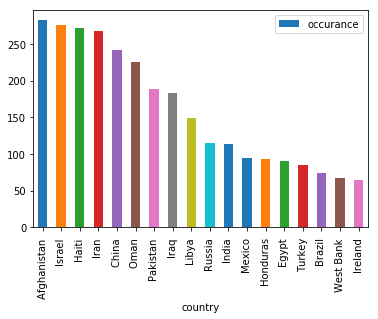

In [22]:
# plot the country occurance
occurance_list_plot = occurance_list.iloc[1:19]
occurance_list_plot.plot.bar(x='country', y='occurance');